In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 
from scipy import stats
from scipy.stats import skew 
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
null = df.isnull().sum()

In [6]:
null

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
df.shape

(26707, 34)

In [8]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [9]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [10]:
df.fillna(method = 'ffill', inplace = True)

In [11]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [12]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

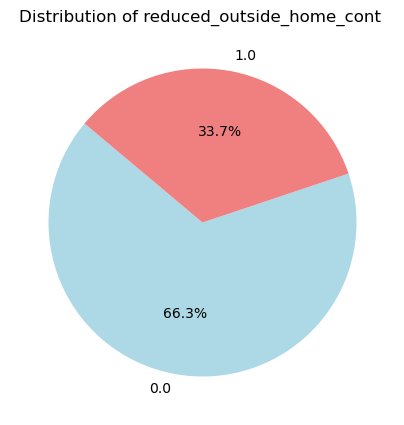

In [13]:
count_reduced_outside_home_cont  = df['reduced_outside_home_cont'].value_counts()


labels = count_reduced_outside_home_cont .index
sizes = count_reduced_outside_home_cont .values
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of reduced_outside_home_cont ')
plt.show()

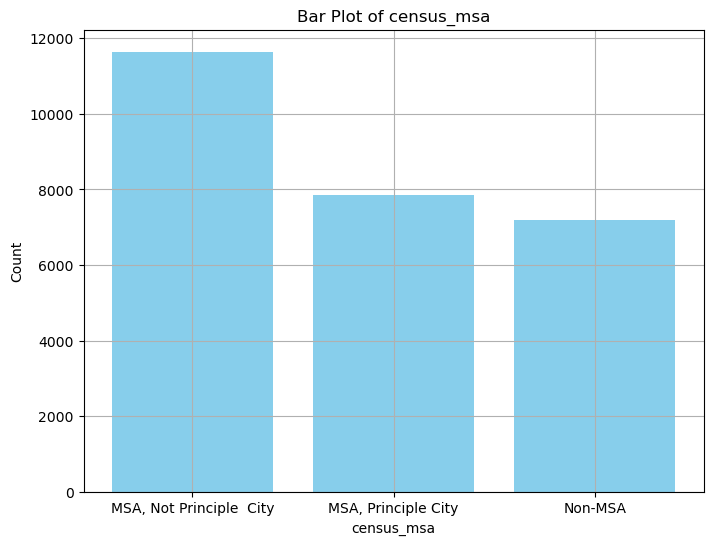

In [14]:
column_name = 'census_msa'
data = df['census_msa'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(data.index, data.values, color='skyblue')
plt.title(f'Bar Plot of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.grid()
plt.show()

In [15]:
duplicates = df[df.duplicated('sick_from_h1n1_vacc', keep=False)]

In [16]:
count_dup = duplicates['sick_from_h1n1_vacc'].value_counts() 

In [17]:
count_dup

sick_from_h1n1_vacc
2.0    9280
1.0    9115
4.0    5943
5.0    2218
3.0     151
Name: count, dtype: int64

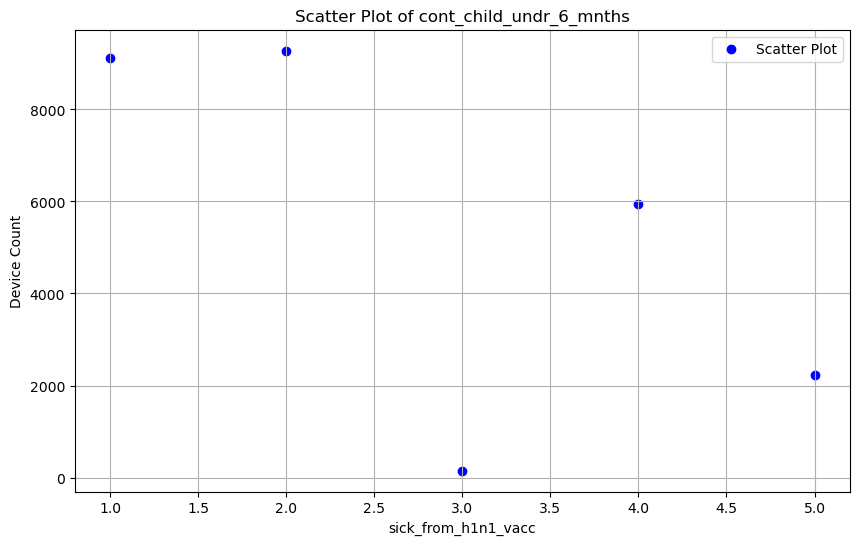

In [18]:
count_dup = duplicates['sick_from_h1n1_vacc'].value_counts()

labels = count_dup.index
counts = count_dup.values

plt.figure(figsize=(10, 6))
plt.scatter(labels, counts, color='blue', label='Scatter Plot')
plt.xlabel('sick_from_h1n1_vacc')
plt.ylabel('Device Count')
plt.title('Scatter Plot of cont_child_undr_6_mnths')
plt.legend()
plt.grid()

plt.show()

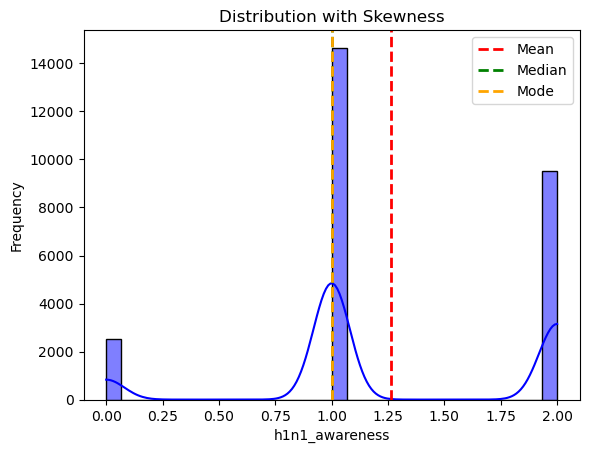

In [19]:
sns.histplot(df['h1n1_awareness'], kde=True, color='blue')

plt.axvline(df['h1n1_awareness'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['h1n1_awareness'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df['h1n1_awareness'].mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')

plt.xlabel('h1n1_awareness')
plt.ylabel('Frequency')
plt.title('Distribution with Skewness')
plt.legend()

plt.show()

In [20]:
ca = ['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']

In [21]:
df.drop(ca, inplace = True, axis = 1)

In [22]:
df.shape

(26707, 25)

In [23]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [24]:
y = df['h1n1_vaccine']
x = df.drop(['h1n1_vaccine'], axis = 1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 88)

In [26]:
log = LogisticRegression()

In [27]:
log.fit(x_train, y_train)

LogisticRegression()

In [28]:
print(f'Training Score : {log.score(x_train, y_train)}')
print(f'Testing Score : {log.score(x_test, y_test)}')

Training Score : 0.8063655511350339
Testing Score : 0.7982029202545863


In [29]:
y_pred = log.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
from sklearn import metrics

# Accuracy

In [32]:
metrics.accuracy_score(y_test, y_pred)

0.7982029202545863

In [33]:
print('', metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

           0       0.82      0.94      0.88      4187
           1       0.57      0.27      0.36      1155

    accuracy                           0.80      5342
   macro avg       0.70      0.61      0.62      5342
weighted avg       0.77      0.80      0.77      5342



In [34]:
print('',metrics.confusion_matrix(y_test,y_pred))

 [[3955  232]
 [ 846  309]]


In [35]:
cnfTrain = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ['Pred','Pred'],
                        index = ['Act0','Act1'])

In [36]:
cnfTrain

,Pred,Pred
Act0,3955,232
Act1,846,309


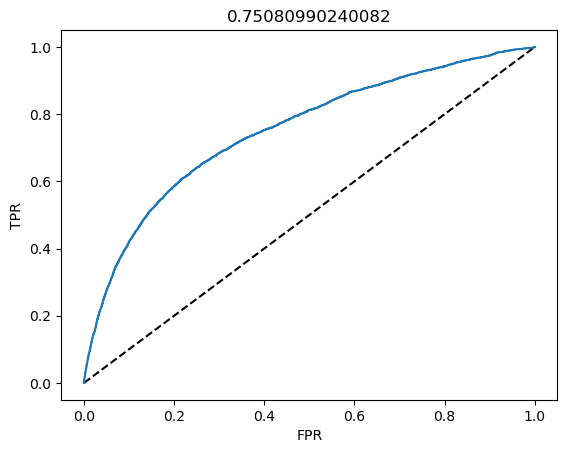

In [37]:
probab = log.predict_proba(x_train)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_train, probab)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(metrics.roc_auc_score(y_train, probab))
plt.show()

In [38]:
param_grid = {
    'penalty' : ['l1','l2'],
    'C' : [0.1, 0.5, 1, 5 ,10]
}

In [39]:
grid_search = GridSearchCV(estimator = log, param_grid = param_grid, cv = 5)

In [40]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [41]:
best_param = grid_search.best_params_
best_model = grid_search.best_estimator_

In [42]:
y_pred = best_model.predict(x_test)

In [43]:
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', acc)

Accuracy : 0.8055035567203295


In [44]:
roc_au = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC :', roc_au)

ROC AUC : 0.6336029785038622


In [45]:
print('', metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

           0       0.84      0.94      0.88      4187
           1       0.59      0.33      0.42      1155

    accuracy                           0.81      5342
   macro avg       0.71      0.63      0.65      5342
weighted avg       0.78      0.81      0.78      5342



In [46]:
grid_search.best_params_

{'C': 5, 'penalty': 'l2'}

# Precision Recall Curve

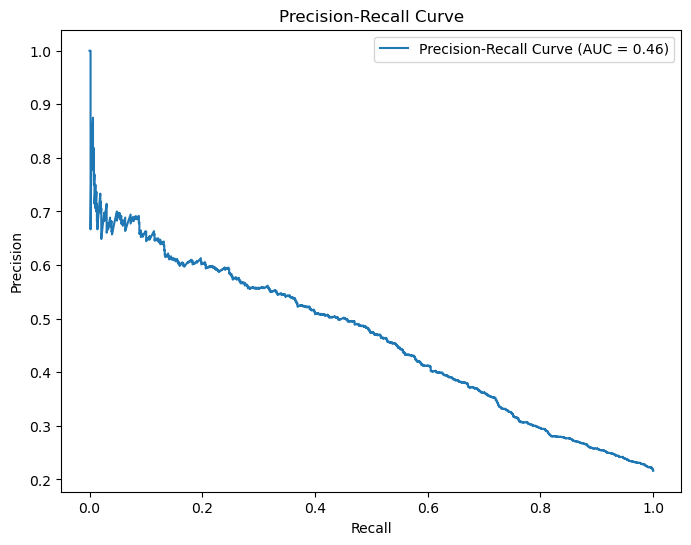

In [47]:
probab = log.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, probab)

auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix Before Tuning

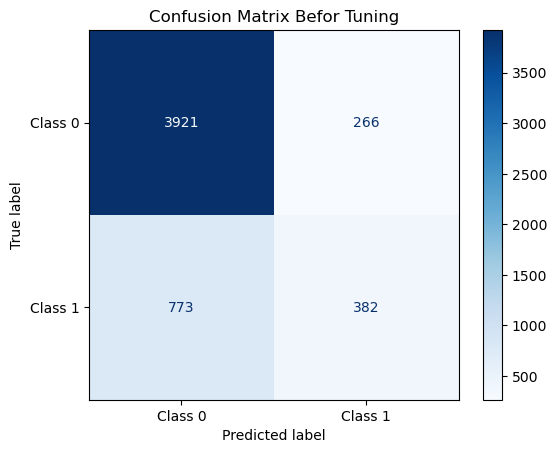

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Befor Tuning')
plt.show()

# Hyperparameter Tuning

In [49]:
param_grid = {
    'C': np.logspace(-3, 3, 7),  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'] 
}

grid_search = GridSearchCV(log, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.8229127667540247


# Confusion Matrix After Tuning

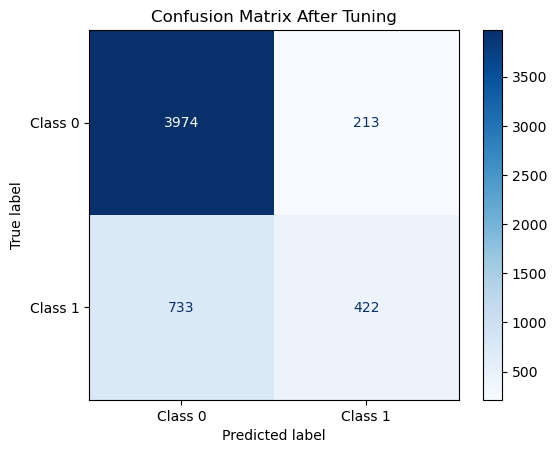

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix After Tuning')
plt.show()

# Cross Validation Score

In [51]:
cv_scores = cross_val_score(log, x, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-Validation Scores: [0.78734556 0.79820292 0.81239468 0.81295638 0.7912376 ]
Mean CV Score: 0.8004274275048224
Standard Deviation of CV Scores: 0.010589866188795304


# Randomized Search CV

In [ ]:
param_dist = {
    'C': uniform(loc=0, scale=4),  
    'penalty': ['l1', 'l2'],        
    'solver': ['liblinear'],        
}

random_search = RandomizedSearchCV(log, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)


# Support Vector Machine

In [ ]:
svm_model = SVC(kernel='linear')  # You can choose different kernels: 'linear', 'rbf', 'poly', etc.
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy with SVM:", accuracy_svm)